In [35]:
! pip install wordcloud

     |████████████████████████████████| 366 kB 20.6 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# Import

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory data analysis

The goal of this part is to compute exploratory data anlysis on the dataset to have a good overview of it and gain information. 

As some part require accurate information, we also do some little preprocessing to have the best exploratory analysis possible. For example, in the following cell, we 

In [4]:
df = pd.read_csv('airbnb_sample_paris.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5396,Explore the heart of old Paris ...,7903,Borzou,,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,80,2,277,2022-01-04,1.82,1,66,45,7510402838018
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE ...,2626,Franck,,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,105,10,290,2021-12-30,2.21,4,212,20,7510400829623
2,7964,Large & sunny flat with balcony ! ...,22155,Anaïs,,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.04,1,365,0,7510903576564
3,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE ...",28422,Bernadette,,Louvre,48.86006,2.34863,Entire home/apt,75,180,0,,,1,148,0,"Available with a mobility lease only (""bail mo..."
4,9952,Paris petit coin douillet ...,33534,Elisabeth,,Popincourt,48.86373,2.37093,Entire home/apt,80,4,34,2021-12-28,0.32,1,212,8,7511101582862


## Early pre-processing

### Columns change

Some columns name have extra blank caracters, we delete them.

In [8]:
df.columns

Index(['id      ',
       'name                                                                            ',
       'host_id   ', 'host_name                         ',
       'neighbourhood_group ', 'neighbourhood       ', 'latitude  ',
       'longitude ', 'room_type       ', 'price ', 'minimum_nights ',
       'number_of_reviews ', 'last_review ', 'reviews_per_month ',
       'calculated_host_listings_count ', 'availability_365 ',
       'number_of_reviews_ltm ', 'license'],
      dtype='object')

In [9]:
df.columns = [col.replace(' ','') for col in df.columns ]
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

### 

### Columns deletion

#### Neighbourhood_group

In [10]:
df['neighbourhood_group'].unique()

array(['                    '], dtype=object)

We note that the `neighbourhood_group` has only one unique value which is " " (space blank). As a result, this column is unsuable, we then delete it.

In [11]:
del df['neighbourhood_group']

#### License

Moreover,`license` holds more than half of its content as missing values. Being a column bearing few meaning we choosed to delete it.

In [12]:
df['license'].isna().sum() / len(df)

0.5221522152215221

In [13]:
del df['license']

### Value modification

In [14]:
def process_empty(x):
    x = x.replace(' ','')
    return x if x!='' else np.NaN

In [15]:
for col in df.columns :
    try:
        df[col] = df[col].apply(process_empty)
    except:
        pass


In [16]:
data_type = {
    'int':['id','price','host_id','minimum_nights','calculated_host_listings_count','availability_365','number_of_reviews_ltm'],
    'float':['latitude','longitude','reviews_per_month'],
    'datetime':['last_review'],
    'object':['name','host_name','room_type']
}

In [17]:
for col in df.columns:
    for key, values in data_type.items():

        if col in values:
            if key == 'datetime':
                df[col] = pd.to_datetime(df[col])
                df['last_review'] = df['last_review'].dt.strftime('%d-%m-%Y')                
            else:
                df[col] = df[col].astype(key)

                
        

As we can see in the following output, in our new, cleaned data set, we have some clearly identifed missing value. As these missing items can be of importance during the modelling phase, we choosed to keep them.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9999 non-null   int64  
 1   name                            9969 non-null   object 
 2   host_id                         9999 non-null   int64  
 3   host_name                       9991 non-null   object 
 4   neighbourhood                   9999 non-null   object 
 5   latitude                        9999 non-null   float64
 6   longitude                       9999 non-null   float64
 7   room_type                       9999 non-null   object 
 8   price                           9999 non-null   int64  
 9   minimum_nights                  9999 non-null   int64  
 10  number_of_reviews               9999 non-null   int64  
 11  last_review                     8041 non-null   object 
 12  reviews_per_month               80

<AxesSubplot:>

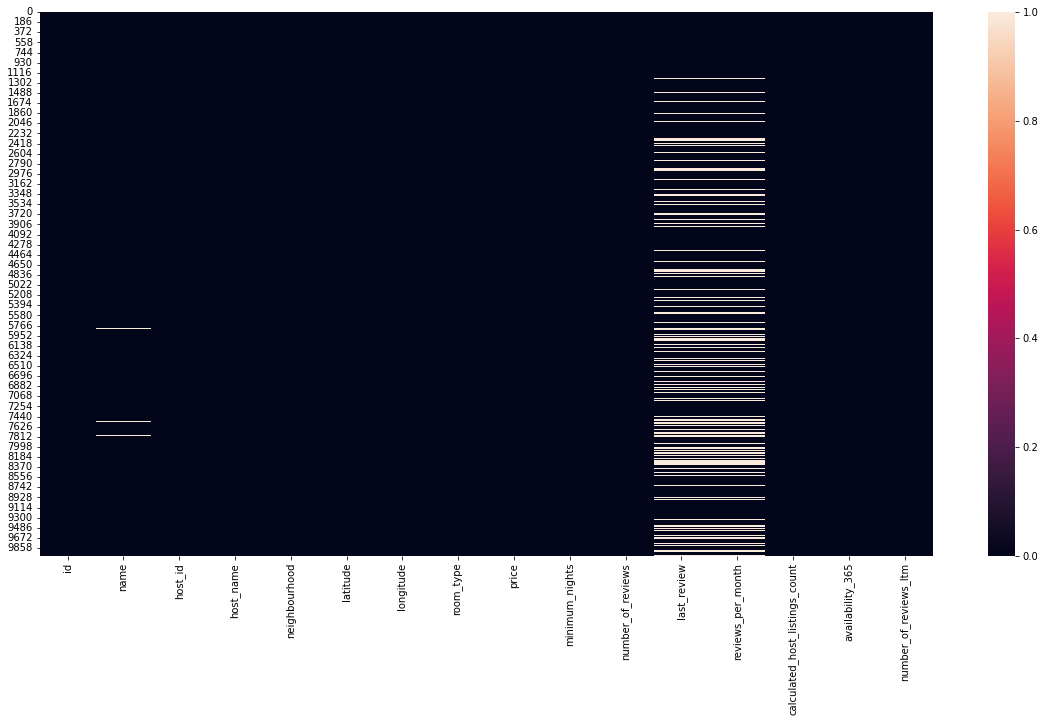

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

## Univariate Analysis

### Price

In [25]:
df['log_price'] = np.log(df['price'])

<AxesSubplot:xlabel='log_price', ylabel='Count'>

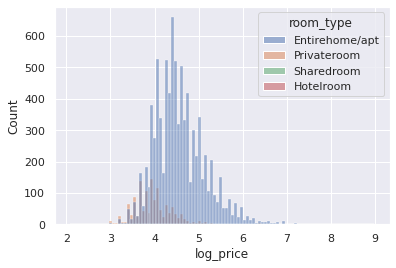

In [32]:
sns.set_theme(style="darkgrid")

<Figure size 1080x1080 with 0 Axes>

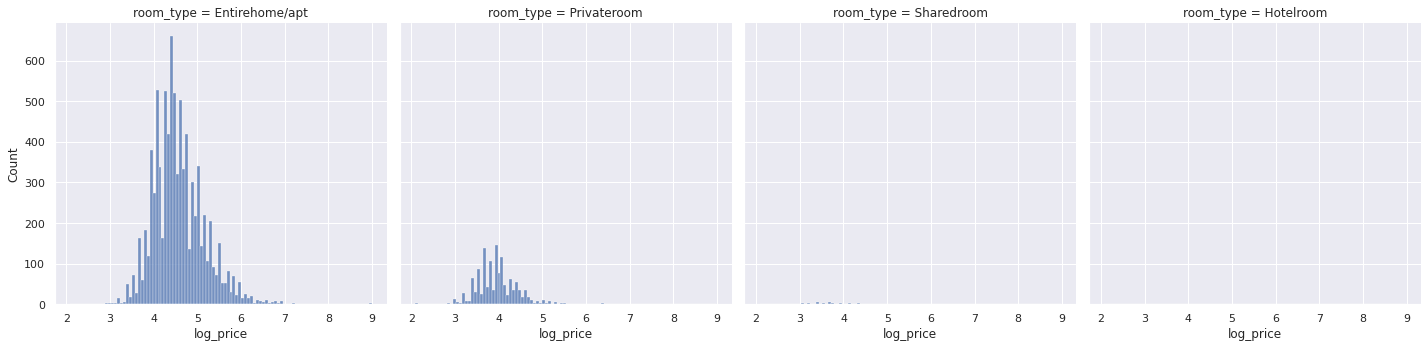

In [33]:
plt.figure(figsize=(15,15))
sns.histplot(data=df, x='log_price', hue='room_type')
sns.displot(data=df,x='log_price',col='room_type')

As expected, the most expensive room are the houses where the entire home is available. We don't have much data on the two last categories (shared room and hotel room) so we can't say much about it.

In [36]:
df['price'].describe()

count    9999.000000
mean      114.309131
std       188.053692
min         8.000000
25%        60.000000
50%        83.000000
75%       125.000000
max      8000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='neighbourhood'>

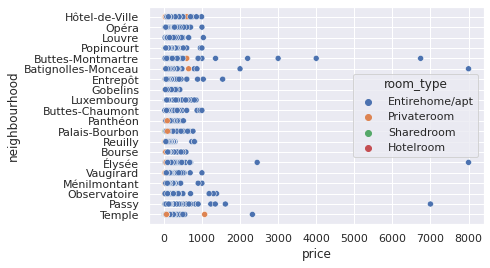

In [71]:
sns.scatterplot(data=df, x='price', y='neighbourhood', hue='room_type')

This plot show us the prices according to the neighborhood. In the fanciest places (Elysée, Buttes-Montmartre), we found the most expensive appartment. 
Moreover, we can see that most of the prices are between 0 and 1000 euros per nights, which correspond to what we can see when we try to rent a house in Air Bnb.

### Textual Variables

### Name

In [50]:
def generate_wordcloud(df,col):
    content = ''
    stopwords = set(STOPWORDS)
    

    for val in df[col].values:
        
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        content += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(content)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()


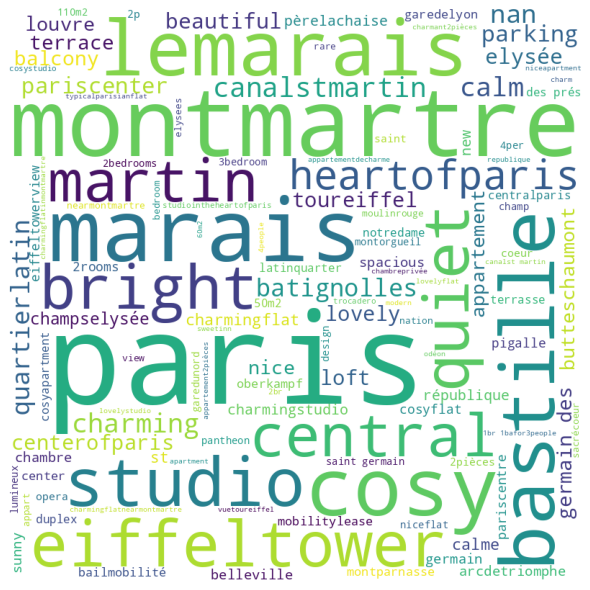

In [51]:
from wordcloud import WordCloud, STOPWORDS

generate_wordcloud(df,'name')

# the bigger the word, the more frequent it is in this field

We can see that the description of the apartments listed in our dataset are skewed towards upper class paris areas. We can also see that there is especially succesful appartment quality adjectives like : cosy, bright, charming etc

### Neighbourhood

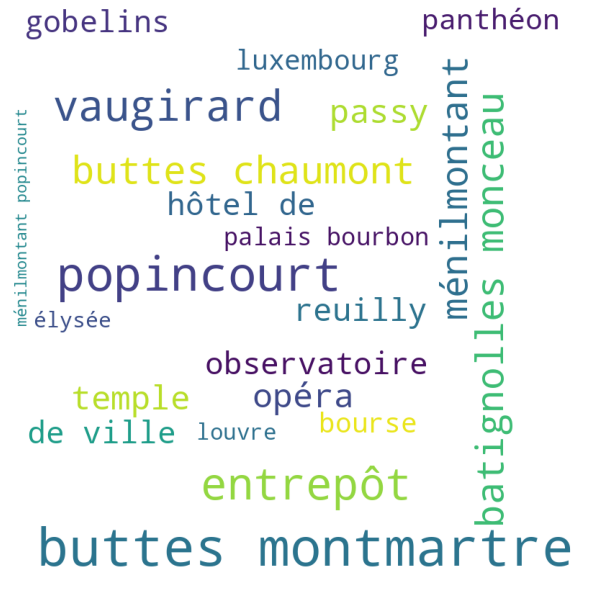

In [54]:
generate_wordcloud(df,'neighbourhood')


In [76]:
df.to_csv('airbnb_paris_updated.csv')